In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sample=pd.read_csv('Sample_Submission.csv')

In [3]:
train.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [4]:
test.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333


In [5]:
train.shape , test.shape, sample.shape

((3506, 9), (1503, 8), (1503, 1))

(array([   5.,    9.,   26.,   56.,  207.,  654., 2031.,  481.,   33.,
           4.]),
 array([-6.4865348 , -5.3945309 , -4.30252701, -3.21052311, -2.11851922,
        -1.02651533,  0.06548857,  1.15749246,  2.24949636,  3.34150025,
         4.43350414]),
 <a list of 10 Patch objects>)

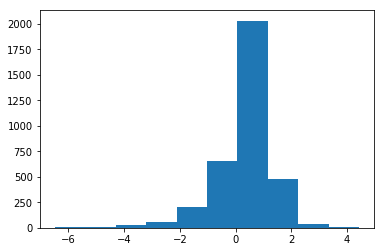

In [6]:
plt.hist(np.log(train['SalesInMillions']))

In [7]:
y=np.log(train['SalesInMillions'])
train.drop('SalesInMillions',axis=1,inplace=True)

In [8]:
df=pd.concat([train,test],axis=0)

In [9]:
print(df.shape)
df.dtypes

(5009, 8)


ID                  int64
CONSOLE            object
YEAR                int64
CATEGORY           object
PUBLISHER          object
RATING             object
CRITICS_POINTS    float64
USER_POINTS       float64
dtype: object

In [10]:
df.drop('ID',axis=1,inplace=True)

In [44]:
#df['cat_rating']=df.groupby(['CATEGORY'])['RATING'].transform('nunique')
df['total_points']=df.groupby(['CRITICS_POINTS'])['USER_POINTS'].transform('sum')

In [45]:
df.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,total_points
0,2,2008,7,140,1,2.833333,0.303704,4.418333
1,12,2012,9,110,2,13.200000,1.640000,3.199767
2,5,2019,8,8,4,4.562500,0.006410,0.683906
3,7,2002,10,56,1,4.181818,0.326923,0.745673
4,8,2013,0,8,4,2.259259,0.032579,1.131706


In [46]:
#df=pd.get_dummies(df,drop_first=True)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat=['CATEGORY','PUBLISHER','RATING','CONSOLE']
for items in cat:
    df[items]=le.fit_transform(df[items])

In [47]:
df.head()

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,total_points
0,2,2008,7,140,1,2.833333,0.303704,4.418333
1,12,2012,9,110,2,13.200000,1.640000,3.199767
2,5,2019,8,8,4,4.562500,0.006410,0.683906
3,7,2002,10,56,1,4.181818,0.326923,0.745673
4,8,2013,0,8,4,2.259259,0.032579,1.131706


In [48]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#sc.fit_transform(df)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
df_train=df.iloc[:3506,:]
df_test=df.iloc[3506:,:]

In [51]:
x_train,x_cv,y_train,y_cv=train_test_split(df_train,y,test_size=0.30,random_state=1)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(max_depth=5,max_features=2)
gb.fit(x_train,y_train)
gb_cv=gb.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,gb_cv)))

1.08365687429473


In [59]:
gb_pred=gb.predict(df_test)

In [33]:
from xgboost import XGBRegressor
model_2 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='rmse'
 )
#model.fit(X_train, y_train)
model_2.fit(x_train, y_train, eval_metric='rmse', 
          eval_set=[(x_cv, y_cv)], early_stopping_rounds=100, verbose=100)

C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:04:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.11566
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.08471
[200]	validation_0-rmse:1.07862
[300]	validation_0-rmse:1.07591
[400]	validation_0-rmse:1.07535
Stopping. Best iteration:
[326]	validation_0-rmse:1.07495



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.01,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=5000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=100, silent=None, subsample=1, verbosity=1)

In [34]:
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=326,
 max_depth=5,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(x_train,y_train)

[00:05:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=x_train,y=y_train,estimator=xgb,scoring='neg_root_mean_squared_error',cv=5)

[00:05:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:05:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:05:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:05:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\hp\Anaconda3\3.7\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:05:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
score

array([-1.01530213, -0.99993673, -0.9218069 , -0.93098866, -0.94115484])

In [37]:
np.mean(score)

-0.9618378518823472

In [38]:
#import xgboost
#from xgboost import XGBRegressor
#xgb=XGBRegressor()
#xgb.fit(x_train,y_train)
xgb_cv=xgb.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,xgb_cv)))

1.0749697180469113


In [39]:
xgb_pred=xgb.predict(df_test)

In [71]:
import catboost
from catboost import CatBoostRegressor
cb=CatBoostRegressor()
cb.fit(x_train,y_train)
cb_cv=cb.predict(x_cv)
print(sqrt(mean_squared_error(y_cv,cb_cv)))

Learning rate set to 0.045793
0:	learn: 1.0180282	total: 317ms	remaining: 5m 17s
1:	learn: 1.0144629	total: 399ms	remaining: 3m 19s
2:	learn: 1.0121177	total: 407ms	remaining: 2m 15s
3:	learn: 1.0104220	total: 415ms	remaining: 1m 43s
4:	learn: 1.0078889	total: 459ms	remaining: 1m 31s
5:	learn: 1.0058142	total: 465ms	remaining: 1m 17s
6:	learn: 1.0036406	total: 470ms	remaining: 1m 6s
7:	learn: 1.0014326	total: 478ms	remaining: 59.3s
8:	learn: 0.9991422	total: 483ms	remaining: 53.2s
9:	learn: 0.9978860	total: 488ms	remaining: 48.3s
10:	learn: 0.9957854	total: 497ms	remaining: 44.7s
11:	learn: 0.9942142	total: 509ms	remaining: 41.9s
12:	learn: 0.9926182	total: 516ms	remaining: 39.2s
13:	learn: 0.9908457	total: 547ms	remaining: 38.6s
14:	learn: 0.9899073	total: 564ms	remaining: 37s
15:	learn: 0.9884466	total: 629ms	remaining: 38.7s
16:	learn: 0.9868474	total: 639ms	remaining: 36.9s
17:	learn: 0.9853377	total: 649ms	remaining: 35.4s
18:	learn: 0.9840578	total: 672ms	remaining: 34.7s
19:	lea

177:	learn: 0.9079864	total: 2.27s	remaining: 10.5s
178:	learn: 0.9075975	total: 2.28s	remaining: 10.4s
179:	learn: 0.9073613	total: 2.28s	remaining: 10.4s
180:	learn: 0.9072177	total: 2.3s	remaining: 10.4s
181:	learn: 0.9071149	total: 2.31s	remaining: 10.4s
182:	learn: 0.9068563	total: 2.33s	remaining: 10.4s
183:	learn: 0.9063757	total: 2.34s	remaining: 10.4s
184:	learn: 0.9062609	total: 2.35s	remaining: 10.3s
185:	learn: 0.9061491	total: 2.35s	remaining: 10.3s
186:	learn: 0.9058057	total: 2.36s	remaining: 10.3s
187:	learn: 0.9055785	total: 2.37s	remaining: 10.2s
188:	learn: 0.9053000	total: 2.37s	remaining: 10.2s
189:	learn: 0.9051643	total: 2.38s	remaining: 10.1s
190:	learn: 0.9046242	total: 2.38s	remaining: 10.1s
191:	learn: 0.9043908	total: 2.39s	remaining: 10.1s
192:	learn: 0.9042928	total: 2.4s	remaining: 10s
193:	learn: 0.9040053	total: 2.4s	remaining: 9.99s
194:	learn: 0.9034012	total: 2.41s	remaining: 9.95s
195:	learn: 0.9030522	total: 2.42s	remaining: 9.91s
196:	learn: 0.902

336:	learn: 0.8635156	total: 3.62s	remaining: 7.12s
337:	learn: 0.8633299	total: 3.63s	remaining: 7.1s
338:	learn: 0.8627338	total: 3.68s	remaining: 7.18s
339:	learn: 0.8624798	total: 3.69s	remaining: 7.16s
340:	learn: 0.8622834	total: 3.7s	remaining: 7.15s
341:	learn: 0.8619252	total: 3.71s	remaining: 7.13s
342:	learn: 0.8614338	total: 3.71s	remaining: 7.11s
343:	learn: 0.8611213	total: 3.72s	remaining: 7.09s
344:	learn: 0.8606906	total: 3.72s	remaining: 7.07s
345:	learn: 0.8606470	total: 3.73s	remaining: 7.05s
346:	learn: 0.8603787	total: 3.74s	remaining: 7.04s
347:	learn: 0.8598000	total: 3.75s	remaining: 7.02s
348:	learn: 0.8595751	total: 3.76s	remaining: 7.01s
349:	learn: 0.8590983	total: 3.76s	remaining: 6.99s
350:	learn: 0.8590607	total: 3.77s	remaining: 6.97s
351:	learn: 0.8584963	total: 3.79s	remaining: 6.97s
352:	learn: 0.8582945	total: 3.82s	remaining: 7s
353:	learn: 0.8582449	total: 3.83s	remaining: 6.98s
354:	learn: 0.8581529	total: 3.83s	remaining: 6.97s
355:	learn: 0.857

503:	learn: 0.8183061	total: 5.17s	remaining: 5.09s
504:	learn: 0.8182495	total: 5.18s	remaining: 5.07s
505:	learn: 0.8178305	total: 5.22s	remaining: 5.1s
506:	learn: 0.8175080	total: 5.23s	remaining: 5.09s
507:	learn: 0.8174675	total: 5.25s	remaining: 5.08s
508:	learn: 0.8172149	total: 5.25s	remaining: 5.07s
509:	learn: 0.8169813	total: 5.26s	remaining: 5.05s
510:	learn: 0.8169313	total: 5.26s	remaining: 5.04s
511:	learn: 0.8168120	total: 5.27s	remaining: 5.03s
512:	learn: 0.8167046	total: 5.28s	remaining: 5.01s
513:	learn: 0.8166180	total: 5.29s	remaining: 5s
514:	learn: 0.8162537	total: 5.29s	remaining: 4.98s
515:	learn: 0.8158216	total: 5.3s	remaining: 4.97s
516:	learn: 0.8154311	total: 5.3s	remaining: 4.95s
517:	learn: 0.8150713	total: 5.31s	remaining: 4.94s
518:	learn: 0.8149594	total: 5.32s	remaining: 4.93s
519:	learn: 0.8146289	total: 5.32s	remaining: 4.91s
520:	learn: 0.8144526	total: 5.33s	remaining: 4.9s
521:	learn: 0.8141254	total: 5.34s	remaining: 4.89s
522:	learn: 0.81382

681:	learn: 0.7777445	total: 6.68s	remaining: 3.11s
682:	learn: 0.7775316	total: 6.68s	remaining: 3.1s
683:	learn: 0.7772241	total: 6.69s	remaining: 3.09s
684:	learn: 0.7768993	total: 6.7s	remaining: 3.08s
685:	learn: 0.7765600	total: 6.71s	remaining: 3.07s
686:	learn: 0.7765362	total: 6.72s	remaining: 3.06s
687:	learn: 0.7763389	total: 6.73s	remaining: 3.05s
688:	learn: 0.7763126	total: 6.74s	remaining: 3.04s
689:	learn: 0.7760521	total: 6.75s	remaining: 3.03s
690:	learn: 0.7760290	total: 6.75s	remaining: 3.02s
691:	learn: 0.7759595	total: 6.76s	remaining: 3.01s
692:	learn: 0.7754998	total: 6.76s	remaining: 3s
693:	learn: 0.7751866	total: 6.77s	remaining: 2.98s
694:	learn: 0.7748281	total: 6.78s	remaining: 2.97s
695:	learn: 0.7745826	total: 6.78s	remaining: 2.96s
696:	learn: 0.7745118	total: 6.79s	remaining: 2.95s
697:	learn: 0.7743426	total: 6.79s	remaining: 2.94s
698:	learn: 0.7740382	total: 6.8s	remaining: 2.93s
699:	learn: 0.7739601	total: 6.8s	remaining: 2.92s
700:	learn: 0.77393

848:	learn: 0.7467587	total: 8.03s	remaining: 1.43s
849:	learn: 0.7467388	total: 8.04s	remaining: 1.42s
850:	learn: 0.7467211	total: 8.04s	remaining: 1.41s
851:	learn: 0.7465421	total: 8.09s	remaining: 1.41s
852:	learn: 0.7463973	total: 8.1s	remaining: 1.4s
853:	learn: 0.7461622	total: 8.11s	remaining: 1.39s
854:	learn: 0.7457757	total: 8.12s	remaining: 1.38s
855:	learn: 0.7457519	total: 8.13s	remaining: 1.37s
856:	learn: 0.7455631	total: 8.15s	remaining: 1.36s
857:	learn: 0.7455421	total: 8.17s	remaining: 1.35s
858:	learn: 0.7450939	total: 8.18s	remaining: 1.34s
859:	learn: 0.7450754	total: 8.19s	remaining: 1.33s
860:	learn: 0.7450166	total: 8.2s	remaining: 1.32s
861:	learn: 0.7447688	total: 8.22s	remaining: 1.31s
862:	learn: 0.7443463	total: 8.22s	remaining: 1.3s
863:	learn: 0.7443174	total: 8.23s	remaining: 1.29s
864:	learn: 0.7440247	total: 8.23s	remaining: 1.28s
865:	learn: 0.7437018	total: 8.24s	remaining: 1.27s
866:	learn: 0.7436428	total: 8.25s	remaining: 1.26s
867:	learn: 0.74

In [73]:
cb_pred=cb.predict(df_test)

In [60]:
gb_pred=np.exp(gb_pred)

In [61]:
sample['SalesInMillions']=gb_pred

In [62]:
sample.head()

,SalesInMillions
0,1.291919
1,1.267677
2,1.738396
3,1.659490
4,1.503607


In [63]:
sample.to_excel('gb_lab_tot_md_5.xlsx',index=False)